# Perceptron and Multilayer Perceptron

COSI/ECON-148B-1 : Introduction to Machine Learning with Economic Applications

Prepared by Pengyu Hong and Zizhang Chen

### 0. Load datasets

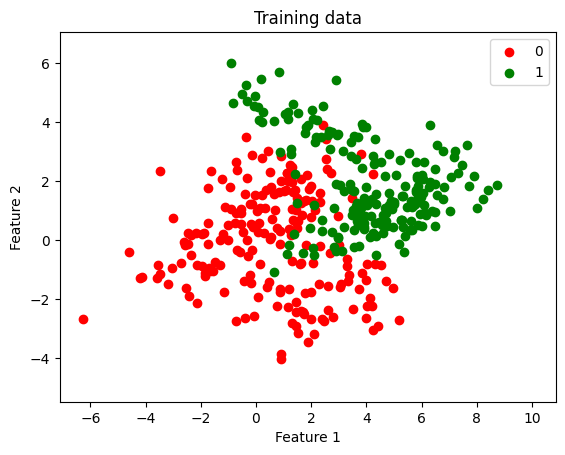

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

data_train = pd.read_csv("Training.csv")
data_test = pd.read_csv("Test.csv")

X_train = data_train.loc[:, ['Feature1', 'Feature2']]
Y_train = data_train.loc[:, 'Label']
X_test = data_test.loc[:, ['Feature1', 'Feature2']]
Y_test = data_test.loc[:, 'Label']

colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_train['Feature1'].min()-1, stop= X_train['Feature1'].max()+1, step = 0.01), np.arange(start = X_train['Feature2'].min()-1, stop= X_train['Feature2'].max()+1, step = 0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("Training data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### 1. Perceptron

Training score = 0.818 ; Test score = 0.8075


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


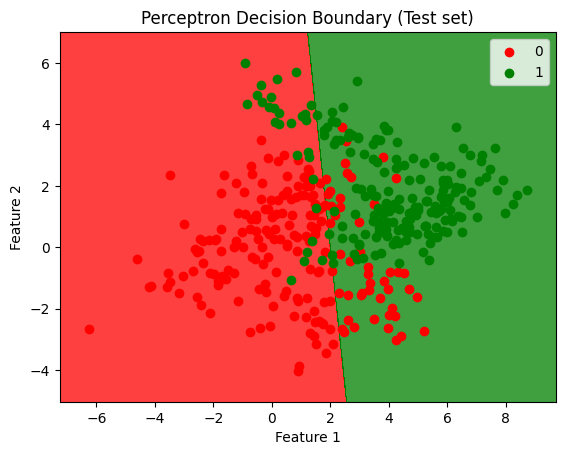

In [3]:
from sklearn.linear_model import Perceptron
import time

# create a Perceptron model, use the current time stamp to initialize the random state
aPerceptron = Perceptron( random_state=int(time.time()) )

# train the Percepton model
aPerceptron.fit(X_train, Y_train)

score_train = aPerceptron.score(X_train, Y_train)
score_test = aPerceptron.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature1'].min()-1, stop= X_test['Feature1'].max()+1, step = 0.01), np.arange(start = X_test['Feature2'].min()-1, stop= X_test['Feature2'].max()+1, step = 0.01))
plt.contourf(X1, X2, aPerceptron.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("Perceptron Decision Boundary (Test set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [4]:
# Check the parameters of the trained Perceptron model
print( aPerceptron.coef_ )
print( aPerceptron.intercept_ )

[[7.50069832 0.83080565]]
[-15.]


### 2. Multilayer Perceptron (MLP)

In [5]:
# import libraries and initialize the random seed
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Training score = 0.877 ; Test score = 0.8875


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


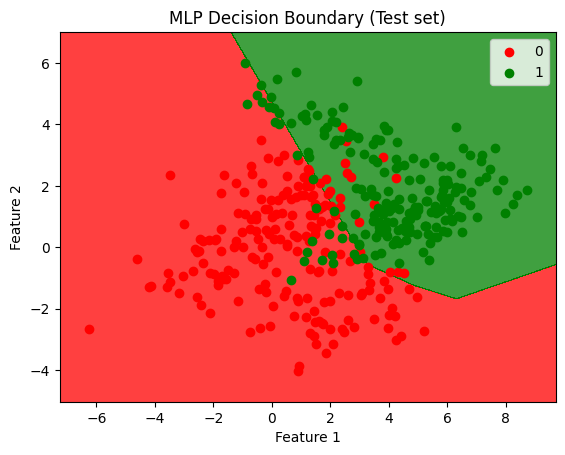

In [6]:
# import libraries and initialize the random seed
from sklearn.neural_network import MLPClassifier

# create a Perceptron model, use the current time stamp to initialize the random state
aMLP = MLPClassifier(hidden_layer_sizes=(3), random_state=int(time.time()), max_iter=1000)

aMLP.fit(X_train, Y_train)

score_train = aMLP.score(X_train, Y_train)
score_test = aMLP.score(X_test, Y_test)
print( 'Training score =', score_train, '; Test score =', score_test )

# visualize the deicsion boundary of the trained Percepton on the test data
colors = ['r', 'g']
X1, X2 = np.meshgrid(np.arange(start = X_test['Feature1'].min()-1, stop= X_test['Feature1'].max()+1, step = 0.01), np.arange(start = X_test['Feature2'].min()-1, stop= X_test['Feature2'].max()+1, step = 0.01))
plt.contourf(X1, X2, aMLP.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(colors) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_test)):
    plt.scatter(X_test['Feature1'][Y_test==j], X_test['Feature2'][Y_test==j], color=colors[i], label = j)
plt.title("MLP Decision Boundary (Test set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
# Check the parameters of the MLP model
print( 'First layer parameters')
print( aMLP.coefs_[0] )
print( aMLP.intercepts_[0] )

print( '\n' )

print( 'Second layer parameters')
print( aMLP.coefs_[1] )
print( aMLP.intercepts_[1] )

First layer parameters
[[-0.45757258  0.36246379 -0.35460844]
 [-0.29509772 -1.10660966 -0.18438216]]
[ 2.39419808 -1.78537469  1.49121193]


Second layer parameters
[[-1.86114795]
 [-0.98253899]
 [-0.75072   ]]
[2.31762733]


#### 3. A too for visulizing a MLP

[Visulization of MLP_sklearn](https://alexlenail.me/NN-SVG/)
